In [6]:
# Importing all libraries from other file

%run Libraries.ipynb

In [7]:
# Loading dataset
Before_Pandemic1 = pd.read_csv('Before_Pandemic1.csv', index_col ='REF_DATE')

During_Pandemic1 = pd.read_csv('During_Pandemic1.csv', index_col ='REF_DATE')

In [8]:
Before_Pandemic1

,GEO,Labour_characteristics,NAICS,Sex,Age group,VALUE,GEO_Cat,NAICS_Cat
REF_DATE,,,,,,,,
2017,Canada,3,"Total, all industries",0,0,19530.3,2,23
2017,Canada,3,"Total, all industries",0,1,2829.8,2,23
2017,Canada,3,"Total, all industries",0,2,12634.6,2,23
2017,Canada,3,"Total, all industries",0,3,4065.8,2,23
2017,Canada,3,"Total, all industries",1,0,10305.3,2,23
...,...,...,...,...,...,...,...,...
2019,British Columbia,0,Unclassified industries,1,3,6.0,1,25
2019,British Columbia,0,Unclassified industries,2,0,25.3,1,25
2019,British Columbia,0,Unclassified industries,2,1,6.3,1,25


### Prediction on 'Before_Pandemic' data

In [4]:
# Dividing data manually in train and test with 80-20 ratio

Percentage=round(len(Before_Pandemic1)/100*80)

Percentage

33892

In [5]:
train = Before_Pandemic1.head(Percentage)

train

,GEO,Labour_characteristics,NAICS,Sex,Age group,VALUE,GEO_Cat,NAICS_Cat
REF_DATE,,,,,,,,
2017,Canada,3,"Total, all industries",0,0,19530.3,2,23
2017,Canada,3,"Total, all industries",0,1,2829.8,2,23
2017,Canada,3,"Total, all industries",0,2,12634.6,2,23
2017,Canada,3,"Total, all industries",0,3,4065.8,2,23
2017,Canada,3,"Total, all industries",1,0,10305.3,2,23
...,...,...,...,...,...,...,...,...
2019,New Brunswick,2,"Forestry, fishing, mining, quarrying, oil and ...",1,0,8.3,4,10
2019,New Brunswick,2,"Forestry, fishing, mining, quarrying, oil and ...",1,1,0.7,4,10
2019,New Brunswick,2,"Forestry, fishing, mining, quarrying, oil and ...",1,2,5.4,4,10


In [6]:
Before_Pandemic1.iloc[33892, :]

GEO                                                           New Brunswick
Labour_characteristics                                                    2
NAICS                     Forestry, fishing, mining, quarrying, oil and ...
Sex                                                                       2
Age group                                                                 2
VALUE                                                                   1.2
GEO_Cat                                                                   4
NAICS_Cat                                                                10
Name: 2019, dtype: object

In [7]:
test = Before_Pandemic1.iloc[33892: , :]

test

,GEO,Labour_characteristics,NAICS,Sex,Age group,VALUE,GEO_Cat,NAICS_Cat
REF_DATE,,,,,,,,
2019,New Brunswick,2,"Forestry, fishing, mining, quarrying, oil and ...",2,2,1.2,4,10
2019,New Brunswick,2,Forestry and logging and support activities fo...,0,0,3.5,4,9
2019,New Brunswick,2,Forestry and logging and support activities fo...,0,1,0.5,4,9
2019,New Brunswick,2,Forestry and logging and support activities fo...,0,2,1.9,4,9
2019,New Brunswick,2,Forestry and logging and support activities fo...,0,3,1.1,4,9
...,...,...,...,...,...,...,...,...
2019,British Columbia,0,Unclassified industries,1,3,6.0,1,25
2019,British Columbia,0,Unclassified industries,2,0,25.3,1,25
2019,British Columbia,0,Unclassified industries,2,1,6.3,1,25


In [8]:
Before_Pandemic1.iloc[42364, :]

GEO                              British Columbia
Labour_characteristics                          0
NAICS                     Unclassified industries
Sex                                             2
Age group                                       3
VALUE                                         3.7
GEO_Cat                                         1
NAICS_Cat                                      25
Name: 2019, dtype: object

In [9]:
X_train = train.drop(['GEO','NAICS','VALUE'],axis='columns')
y_train = train['VALUE']


X_test = test.drop(['GEO','NAICS','VALUE'],axis='columns')
y_test = test['VALUE']

#### Linear Regression Model

In [10]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [11]:
y_pred = regressor.predict(X_test)

In [12]:
# Print result of MAE
print(metrics.mean_absolute_error(y_test, y_pred))

# Print result of MSE
print(metrics.mean_squared_error(y_test, y_pred))

# Print result of RMSE
print(np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))

150.69923044952642
110607.6635078934
12.275961487782798


In [13]:
# Calculate and display accuracy
accuracy = 100 - np.sqrt(metrics.mean_absolute_error(y_test, y_pred))
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 87.72 %.


#### Random Forest Regressor Model

In [14]:
# Import the model we are using
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 1)

# Train the model on training data
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=1)

In [15]:
y_pred2 = rf.predict(X_test)

In [16]:
# Print result of MAE
print(metrics.mean_absolute_error(y_test, y_pred2))

# Print result of MSE
print(metrics.mean_squared_error(y_test, y_pred2))

# Print result of RMSE
print(np.sqrt(metrics.mean_absolute_error(y_test, y_pred2)))

4.535162139491047
261.9812792096701
2.1295920124500483


In [17]:
# Calculate and display accuracy
accuracy = 100 - np.sqrt(metrics.mean_absolute_error(y_test, y_pred2))
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 97.87 %.


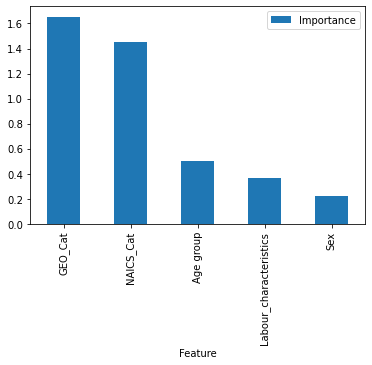

In [18]:
# Calculating Feature importance

I = importances(rf, X_train, y_train)
I.plot(kind = 'bar')
plt.show()

- As, we can see that 'GEO_Cat' and 'NAICS_Cat' features have higher importance compare to other features. So, we will take only those two features in our prediction models to check the accuracy.

In [19]:
X_train2 = train.drop(['GEO','NAICS','Labour_characteristics','VALUE', 'Sex', 'Age group'],axis='columns')
y_train2 = train['VALUE']


X_test2 = test.drop(['GEO','NAICS','Labour_characteristics','VALUE', 'Sex', 'Age group'],axis='columns')
y_test2 = test['VALUE']

#### Linear Regression with important features

In [20]:
regressor = LinearRegression()
regressor.fit(X_train2, y_train2)

LinearRegression()

In [21]:
y_pred4 = regressor.predict(X_test2)

In [22]:
# Print result of MAE
print(metrics.mean_absolute_error(y_test2, y_pred4))

# Print result of MSE
print(metrics.mean_squared_error(y_test2, y_pred4))

# Print result of RMSE
print(np.sqrt(metrics.mean_absolute_error(y_test2, y_pred4)))

148.10412983397515
111917.77727385999
12.169804017895077


In [23]:
# Calculate and display accuracy
accuracy = 100 - np.sqrt(metrics.mean_absolute_error(y_test2, y_pred4))
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 87.83 %.


#### Random Forest Regressor with important features

In [24]:
# Instantiate model with 1000 decision trees
rf4 = RandomForestRegressor(n_estimators = 1000, random_state = 1)
# Train the model on training data
rf4.fit(X_train2, y_train2)

RandomForestRegressor(n_estimators=1000, random_state=1)

In [25]:
y_pred7 = rf4.predict(X_test2)

In [26]:
# Print result of MAE
print(metrics.mean_absolute_error(y_test2, y_pred7))

# Print result of MSE
print(metrics.mean_squared_error(y_test2, y_pred7))

# Print result of RMSE
print(np.sqrt(metrics.mean_absolute_error(y_test2, y_pred7)))

80.85455649652626
67714.79320243589
8.99191617490545


In [27]:
# Calculate and display accuracy
accuracy = 100 - np.sqrt(metrics.mean_absolute_error(y_test2, y_pred7))
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 91.01 %.


### Prediction on 'During_Pandemic' data

In [28]:
During_Pandemic1

,GEO,Labour_characteristics,NAICS,Sex,Age group,VALUE,GEO_Cat,NAICS_Cat
REF_DATE,,,,,,,,
2020,Canada,3,"Total, all industries",0,0,19896.6,2,23
2020,Canada,3,"Total, all industries",0,1,2775.5,2,23
2020,Canada,3,"Total, all industries",0,2,12807.8,2,23
2020,Canada,3,"Total, all industries",0,3,4313.3,2,23
2020,Canada,3,"Total, all industries",1,0,10534.8,2,23
...,...,...,...,...,...,...,...,...
2021,British Columbia,0,Unclassified industries,1,3,10.9,1,25
2021,British Columbia,0,Unclassified industries,2,0,43.5,1,25
2021,British Columbia,0,Unclassified industries,2,1,11.9,1,25


In [29]:
# Dividing data manually in train and test with 80-20 ratio

Percentage1=round(len(During_Pandemic1)/100*80)

Percentage1

22899

In [30]:
train1 = During_Pandemic1.head(Percentage1)

train1

,GEO,Labour_characteristics,NAICS,Sex,Age group,VALUE,GEO_Cat,NAICS_Cat
REF_DATE,,,,,,,,
2020,Canada,3,"Total, all industries",0,0,19896.6,2,23
2020,Canada,3,"Total, all industries",0,1,2775.5,2,23
2020,Canada,3,"Total, all industries",0,2,12807.8,2,23
2020,Canada,3,"Total, all industries",0,3,4313.3,2,23
2020,Canada,3,"Total, all industries",1,0,10534.8,2,23
...,...,...,...,...,...,...,...,...
2021,Ontario,2,Finance and insurance [52],1,2,167.6,7,6
2021,Ontario,2,Finance and insurance [52],1,3,35.4,7,6
2021,Ontario,2,Finance and insurance [52],2,0,221.9,7,6


In [31]:
During_Pandemic1.iloc[22898, :]

GEO                                          Ontario
Labour_characteristics                             2
NAICS                     Finance and insurance [52]
Sex                                                2
Age group                                          2
VALUE                                          170.9
GEO_Cat                                            7
NAICS_Cat                                          6
Name: 2021, dtype: object

In [32]:
test1 = During_Pandemic1.iloc[22899: , :]

test1

,GEO,Labour_characteristics,NAICS,Sex,Age group,VALUE,GEO_Cat,NAICS_Cat
REF_DATE,,,,,,,,
2021,Ontario,2,Finance and insurance [52],2,3,40.2,7,6
2021,Ontario,2,Real estate and rental and leasing [53],0,0,133.9,7,20
2021,Ontario,2,Real estate and rental and leasing [53],0,1,4.3,7,20
2021,Ontario,2,Real estate and rental and leasing [53],0,2,89.8,7,20
2021,Ontario,2,Real estate and rental and leasing [53],0,3,39.8,7,20
...,...,...,...,...,...,...,...,...
2021,British Columbia,0,Unclassified industries,1,3,10.9,1,25
2021,British Columbia,0,Unclassified industries,2,0,43.5,1,25
2021,British Columbia,0,Unclassified industries,2,1,11.9,1,25


In [33]:
During_Pandemic1.iloc[28623, :]

GEO                              British Columbia
Labour_characteristics                          0
NAICS                     Unclassified industries
Sex                                             2
Age group                                       3
VALUE                                        11.1
GEO_Cat                                         1
NAICS_Cat                                      25
Name: 2021, dtype: object

In [34]:
X_train1 = train1.drop(['GEO','NAICS','VALUE'],axis='columns')
y_train1 = train1['VALUE']


X_test1 = test1.drop(['GEO','NAICS','VALUE'],axis='columns')
y_test1 = test1['VALUE']

#### Linear Regression Model

In [35]:
regressor1 = LinearRegression()
regressor1.fit(X_train1, y_train1)

LinearRegression()

In [36]:
y_pred1 = regressor1.predict(X_test1)

In [37]:
# Print result of MAE
print(metrics.mean_absolute_error(y_test1, y_pred1))

# Print result of MSE
print(metrics.mean_squared_error(y_test1, y_pred1))

# Print result of RMSE
print(np.sqrt(metrics.mean_absolute_error(y_test1, y_pred1)))

142.0060801921158
37706.03385049315
11.916630404276026


In [38]:
# Calculate and display accuracy
accuracy = 100 - np.sqrt(metrics.mean_absolute_error(y_test1, y_pred1))
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 88.08 %.


#### Random Forest Regressor Model

In [39]:
# Instantiate model with 1000 decision trees
rf1 = RandomForestRegressor(n_estimators = 1000, random_state = 1)
# Train the model on training data
rf1.fit(X_train1, y_train1)

RandomForestRegressor(n_estimators=1000, random_state=1)

In [40]:
y_pred3 = rf1.predict(X_test1)

In [41]:
# Print result of MAE
print(metrics.mean_absolute_error(y_test1, y_pred3))

# Print result of MSE
print(metrics.mean_squared_error(y_test1, y_pred3))

# Print result of RMSE
print(np.sqrt(metrics.mean_absolute_error(y_test1, y_pred3)))

7.129296648469087
1050.3324954594175
2.67007427770635


In [42]:
# Calculate and display accuracy
accuracy = 100 - np.sqrt(metrics.mean_absolute_error(y_test1, y_pred3))
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 97.33 %.


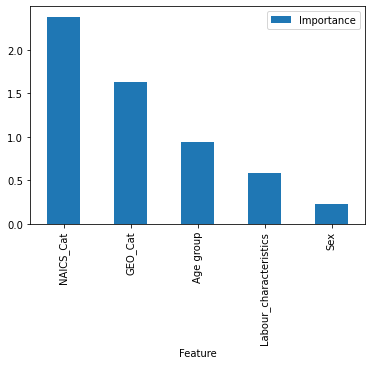

In [43]:
I1 = importances(rf1, X_train1, y_train1)
I1.plot(kind = 'bar')
plt.show()

In [44]:
X_train3 = train1.drop(['GEO','NAICS','Labour_characteristics','VALUE', 'Sex', 'Age group'],axis='columns')
y_train3 = train1['VALUE']


X_test3 = test1.drop(['GEO','NAICS','Labour_characteristics','VALUE', 'Sex', 'Age group'],axis='columns')
y_test3 = test1['VALUE']

#### Linear Regression Model with important features

In [45]:
regressor = LinearRegression()
regressor.fit(X_train3, y_train3)

LinearRegression()

In [46]:
y_pred5 = regressor.predict(X_test3)

In [47]:
# Print result of MAE
print(metrics.mean_absolute_error(y_test3, y_pred5))

# Print result of MSE
print(metrics.mean_squared_error(y_test3, y_pred5))

# Print result of RMSE
print(np.sqrt(metrics.mean_absolute_error(y_test3, y_pred5)))

139.86169982689023
36990.11918219538
11.82631387317664


In [48]:
# Calculate and display accuracy
accuracy = 100 - np.sqrt(metrics.mean_absolute_error(y_test3, y_pred5))
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 88.17 %.


#### Random Forest Regressor with important features

In [49]:
# Instantiate model with 1000 decision trees
rf5 = RandomForestRegressor(n_estimators = 1000, random_state = 1)
# Train the model on training data
rf5.fit(X_train3, y_train3)

RandomForestRegressor(n_estimators=1000, random_state=1)

In [50]:
y_pred6 = rf5.predict(X_test3)

In [51]:
# Print result of MAE
print(metrics.mean_absolute_error(y_test3, y_pred6))

# Print result of MSE
print(metrics.mean_squared_error(y_test3, y_pred6))

# Print result of RMSE
print(np.sqrt(metrics.mean_absolute_error(y_test3, y_pred6)))

62.25967675886332
33001.41645119499
7.890480134875401


In [52]:
# Calculate and display accuracy
accuracy = 100 - np.sqrt(metrics.mean_absolute_error(y_test3, y_pred6))
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 92.11 %.


#### Results on 'Before_Pandemic(2017-2019)' dataset 

| Model | Accuracy(Without feature importance) | Accuracy(With feature importance) |
|:-:|:-:|:-:|
| Linear Regression | 87.72% | 87.83% |
| Random Forest Regressor| 97.87% | 91.01% |

#### Results on 'During_Pandemic(2020-2021)' dataset

| Model | Accuracy(Without feature importance) | Accuracy(With feature importance) |
|:-:|:-:|:-:|
| Linear Regression | 88.08% | 88.17% |
| Random Forest Regressor| 97.33% | 92.33% |

- After observing the result, we can conclude that all features together work better compare to only important features.